In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
def display(y_test,y_pred):
    plt.figure(figsize=(10,8))
    plt.title('PREDICTION VS ACTUAL ', fontsize=24 , fontstyle='italic')
    plt.plot(range(len(y_test)), np.sort(y_test), '.')
    plt.plot(range(len(y_test)),np.sort(y_pred),c='r')
    plt.show()

In [123]:
def score(y_pred,y_test,print_range=0.91):
    from sklearn.metrics import confusion_matrix , accuracy_score
    print('confusion_matrix : ', confusion_matrix(y_pred,y_test))
    print('Accuracy         : ', accuracy_score(y_pred,y_test))
    return accuracy_score(y_pred,y_test)

In [124]:
def hypothesis(model):
    try:
        print(type(model).__name__,' Model coefficient ',model.coef_)
        print(type(model).__name__,' Model collinearity ',model.intercept_)
    except:
        print(type(model).__name__,' Has no coefficient and collinearity')

In [125]:
def outliers_with_IQR(data,key,kernal=1.5):
    import statistics
    med = int(len(data[key])/2)
    sorted_data = sorted(data[key])
    Q1 = statistics.median(sorted_data[:med])
    Q2 = statistics.median(sorted_data[med:])
    iqr = Q2 - Q1
    outliers_range_1 = Q1 - iqr*kernal
    outliers_range_2 = Q2 + iqr*kernal
    data = data[data[key]>outliers_range_1]
    data = data[data[key]<outliers_range_2]
    return data

In [126]:
def outliers_with_IQR(data,keys,kernal=1.5):
    import statistics
    for key in keys:
        med = int(len(data[key])/2)
        sorted_data = sorted(data[key])
        Q1 = statistics.median(sorted_data[:med])
        Q2 = statistics.median(sorted_data[med:])
        iqr = Q2 - Q1
        outliers_range_1 = Q1 - iqr*kernal
        outliers_range_2 = Q2 + iqr*kernal
        data = data[data[key]>outliers_range_1]
        data = data[data[key]<outliers_range_2]

    return data

In [127]:
## Get Data
dataSet = pd.read_csv('heart.csv')

In [128]:
# Check labeled data
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [129]:
# Check Nullable Data
dataSet.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [130]:
# Split Data To Features and targets
X = dataSet.iloc[:,[0,2,3,4,7,8,9,12]].values
y = dataSet.iloc[:,-1].values

C:\Users\Geek\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D134827B8>,
      dtype=object)

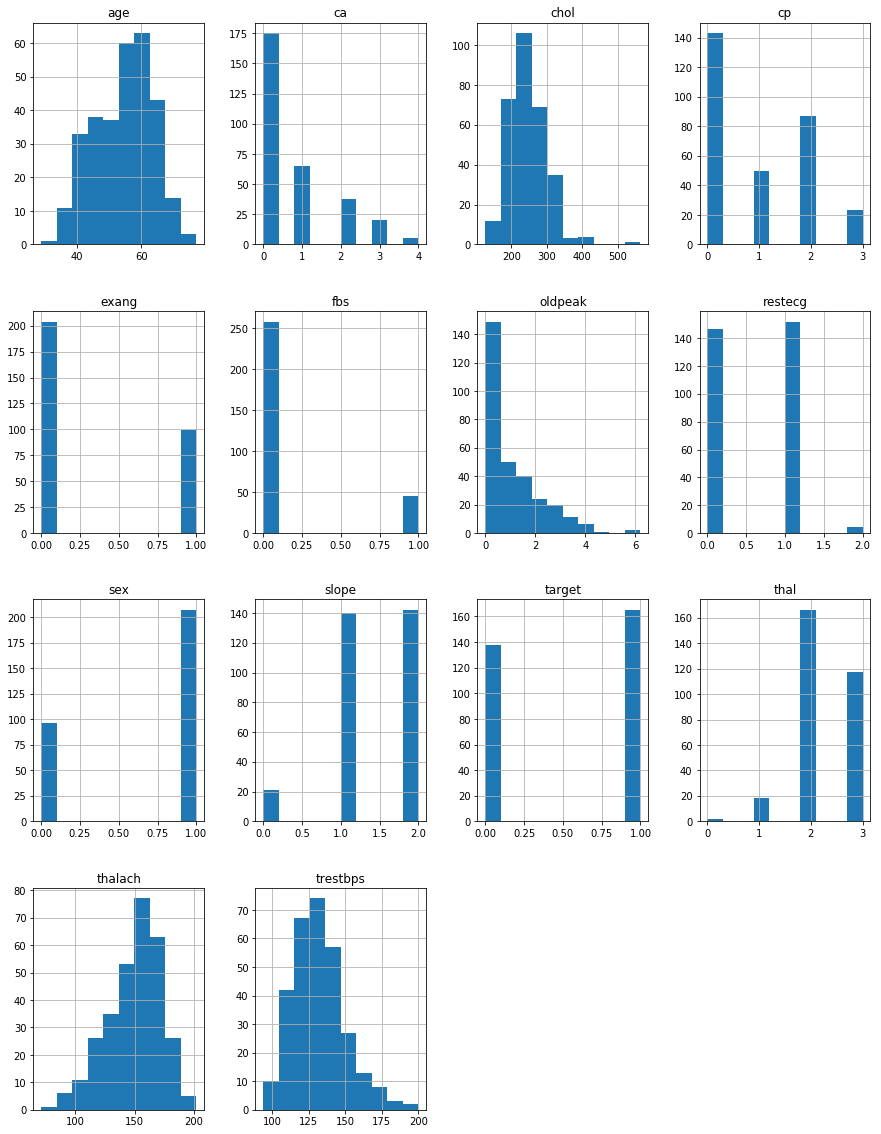

In [131]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataSet.hist(ax = ax)

In [186]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.2,random_state=0)
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=5000,learning_rate=.1,depth=3,loss_function='MultiClass')
model.fit(X_train, y_train,eval_set=(X_test, y_test),plot=False,use_best_model=True,logging_level='Silent')
y_pred = model.predict(X_test)
score(y_pred,y_test)

confusion_matrix :  [[22  2]
 [ 5 32]]
Accuracy         :  0.8852459016393442


0.8852459016393442

In [187]:
y_pred = model.predict(X_test)

In [188]:
score(y_pred,y_test)

confusion_matrix :  [[22  2]
 [ 5 32]]
Accuracy         :  0.8852459016393442


0.8852459016393442